# Filtering and convolutions

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### Convolution

Convolution is a way to process an image by looking at each pixel's neighborhood and combining its values using a small kernel (filter) (every pixel after convolution is the sum of elementwise product of the neighborhood and kernel). It lets us detect patterns like edges, blur, or sharpen by emphasizing or suppressing local structures.

Example:

In [2]:
# Simple 5x5 "image"
img = np.array([[10, 20, 30, 40, 50],
                [60, 70, 80, 90,100],
                [110,120,130,140,150],
                [160,170,180,190,200],
                [210,220,230,240,250]], dtype=np.float32)

# Example 3x3 kernel
kernel = np.array([[ 0,  1, 0],
                   [ 1, -4, 1],
                   [ 0,  1, 0]])

# Padding to keep output same size
padded = np.pad(img, 1)

output = np.zeros_like(img)
for i in range(img.shape[0]): # we are "sliding" the kernel over the image
    for j in range(img.shape[1]):
        region = padded[i:i+3, j:j+3]
        output[i,j] = np.sum(region * kernel) # then we do element-wise multiplication and sum the result for each pixel

print("Original image:\n", img)
print("\nConvolved image:\n", output)


Original image:
 [[ 10.  20.  30.  40.  50.]
 [ 60.  70.  80.  90. 100.]
 [110. 120. 130. 140. 150.]
 [160. 170. 180. 190. 200.]
 [210. 220. 230. 240. 250.]]

Convolved image:
 [[  40.   30.   20.   10.  -60.]
 [ -50.    0.    0.    0. -110.]
 [-100.    0.    0.    0. -160.]
 [-150.    0.    0.    0. -210.]
 [-460. -270. -280. -290. -560.]]


Filters are applied to images by convolution. 

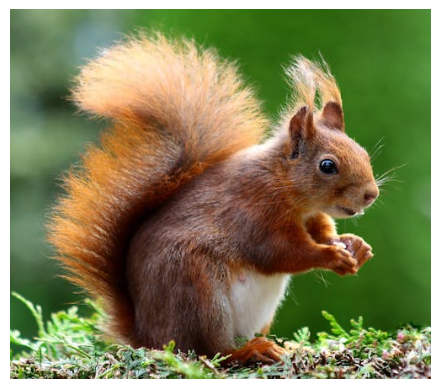

In [3]:
img = cv2.imread("./data/squirrel.jpeg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

#### Box/Mean Filter

A basic blur filter:

$k=\frac{1}{m \cdot n}\begin{bmatrix} 1 & 1 & ... & 1 \\ 1 & 1 & ... & 1 \\ ... \\ 1 & 1 & ... & 1 \end{bmatrix}$

where $m$ and $n$ are the filter dimensions

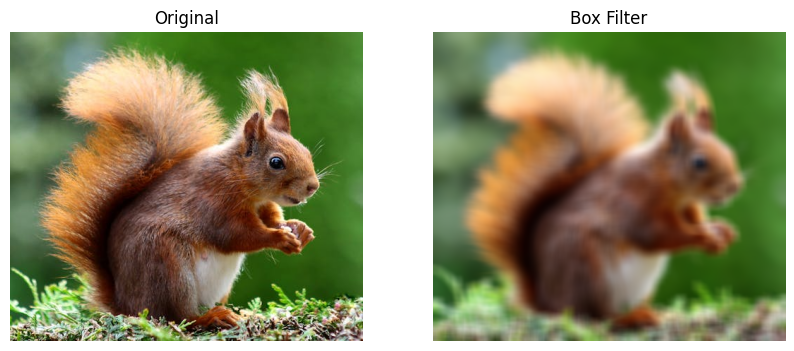

In [4]:
box = cv2.blur(img, ksize=(15, 15))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Box Filter")
plt.imshow(box)
plt.axis("off")

plt.show()

#### Gaussian Filter

A box (mean) filter averages all pixels in a neighborhood equally, which causes strong blurring and blocky artifacts, while a Gaussian filter weights nearby pixels more than distant ones, producing smoother blur and better edge preservation

$k=\frac{1}{Z}\exp{(-\frac{x^2+y^2}{2\sigma^2})}$

where $x$, $y$ are offsets from the filter center

$\sigma$ controls blur strength

$Z$ is a normalization constant

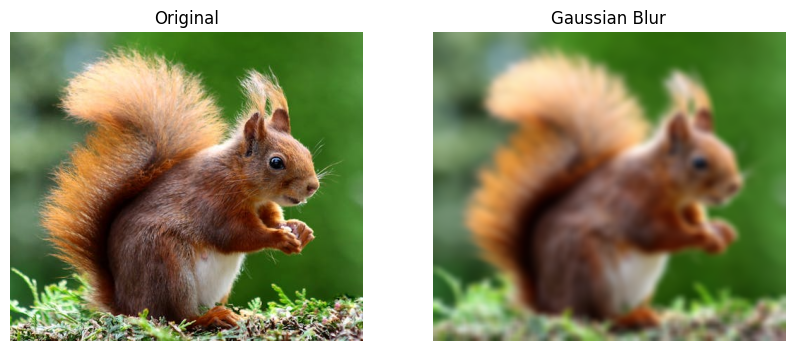

In [5]:
gaussian = cv2.GaussianBlur(img, (15, 15), sigmaX=5, sigmaY=5) # sigmaX and sigmaY control the amount of blur

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Gaussian Blur")
plt.imshow(gaussian)
plt.axis("off")

plt.show()

### Edge Detection

Edge detection finds pixels where image intensity changes sharply, which usually correspond to object boundaries, shapes, or texture transitions.

It's used to simplify images and extract structure for tasks like segmentation, object detection, and feature extraction.

It can be applied with the following filters:

**Sobel**

Sobel edge detection applies two small filters that look like:

$S_x=\begin{bmatrix} -1 & 0  & 1 \\ -2 & 0 & 2 \\  -1 & 0 & 1 \end{bmatrix}$

and the same in y

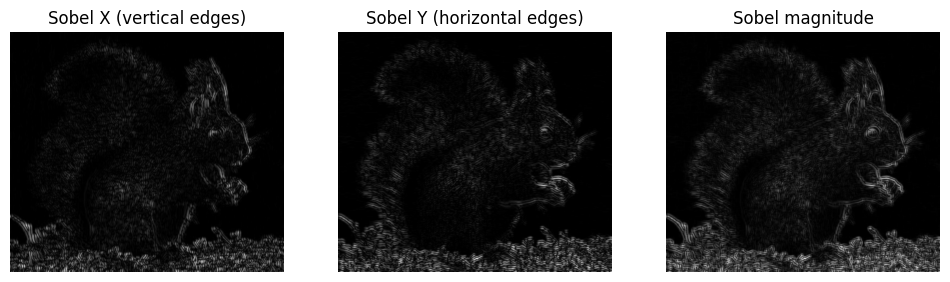

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert to grayscale for edge detection

# Sobel gradients
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 2, 0, ksize=9)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 2, ksize=9)

# Gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_mag = np.uint8(sobel_mag / sobel_mag.max() * 255)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Sobel X (vertical edges)")
plt.imshow(np.abs(sobel_x), cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Sobel Y (horizontal edges)")
plt.imshow(np.abs(sobel_y), cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Sobel magnitude")
plt.imshow(sobel_mag, cmap="gray")
plt.axis("off")

plt.show()

Edges can also be computed using **Canny** edge detection.

Canny works by:

- Smoothing the image to reduce noise, then computing intensity gradients to find potential edges.

- Keeping only strong, well-connected edges using thinning (non-maximum suppression) and double thresholding.

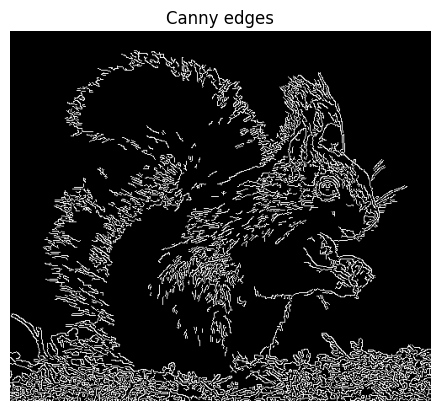

In [7]:
edges = cv2.Canny(
    gray,
    threshold1=100,
    threshold2=200
)

plt.imshow(edges, cmap="gray")
plt.title("Canny edges")
plt.axis("off")
plt.show()

## Summary

In this notebook, we learned how local pixel neighborhoods define image structure through convolution, and how kernels can emphasize patterns like edges, smoothness, or sharpness. By applying filters and edge detection (Sobel and Canny), we explored how images can be enhanced, simplified, and cleaned, building a foundation for extracting meaningful visual features in computer vision pipelines.